In [1]:
## Imports
import glob
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import shutil
import csv
import yaml

                    protocol  recv-q  send-q local address  local port  \
timestamp                                                                
2022-08-18 15:28:04      tcp       0       0  192.168.1.46          80   
2022-08-18 15:28:04      tcp       0       0  192.168.1.46       53106   
2022-08-18 15:28:04      tcp       0       0     127.0.0.1       43927   
2022-08-18 15:28:04      tcp       0       0  192.168.1.46       56482   
2022-08-18 15:28:04      tcp       0       0  192.168.1.46       40595   
...                      ...     ...     ...           ...         ...   
2022-08-18 15:33:11      tcp       0       0  192.168.1.46          80   
2022-08-18 15:33:11      tcp       0       0  192.168.1.46       42396   
2022-08-18 15:33:11      tcp       0       0     127.0.0.1       43927   
2022-08-18 15:33:11      tcp       0       0     127.0.0.1       38076   
2022-08-18 15:33:11      tcp       0       0  192.168.1.46       53106   

                    foreign address  

<AxesSubplot:xlabel='timestamp'>

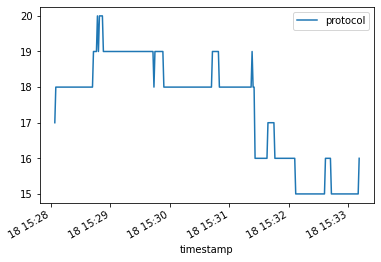

In [13]:
import netstatParser
df = netstatParser.createNetstat()
df.groupby('timestamp').count()['protocol'].plot(legend=True)

                    protocol  recv-q  send-q local address  local port  \
timestamp                                                                
2022-08-18 15:28:04      tcp       0       0  192.168.1.46          80   
2022-08-18 15:28:04      tcp       0       0  192.168.1.46       53106   
2022-08-18 15:28:04      tcp       0       0     127.0.0.1       43927   
2022-08-18 15:28:04      tcp       0       0  192.168.1.46       56482   
2022-08-18 15:28:04      tcp       0       0  192.168.1.46       40595   
...                      ...     ...     ...           ...         ...   
2022-08-18 15:33:11      tcp       0       0  192.168.1.46          80   
2022-08-18 15:33:11      tcp       0       0  192.168.1.46       42396   
2022-08-18 15:33:11      tcp       0       0     127.0.0.1       43927   
2022-08-18 15:33:11      tcp       0       0     127.0.0.1       38076   
2022-08-18 15:33:11      tcp       0       0  192.168.1.46       53106   

                    foreign address  

<AxesSubplot:xlabel='timestamp'>

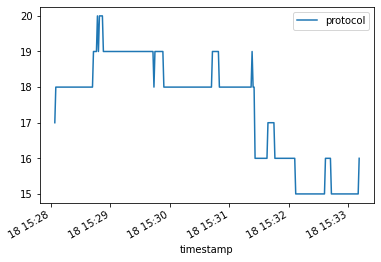

In [11]:
print(df.groupby('timestamp').count()['protocol'])

timestamp
2022-08-18 15:28:04    17
2022-08-18 15:28:05    18
2022-08-18 15:28:06    18
2022-08-18 15:28:07    18
2022-08-18 15:28:08    18
                       ..
2022-08-18 15:33:07    15
2022-08-18 15:33:08    15
2022-08-18 15:33:09    15
2022-08-18 15:33:10    15
2022-08-18 15:33:11    16
Name: protocol, Length: 300, dtype: int64
